In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv


In [2]:
features = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv")

In [3]:
test = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv")


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df = train.merge(features,on=["Store","Date","IsHoliday"],how='inner')

In [9]:
df=df.merge(stores,on='Store',how='inner')

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [11]:
df.tail(70)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421500,45,95,2012-10-19,48434.97,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421501,45,97,2012-10-19,5575.90,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421502,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421503,45,1,2012-10-26,27117.16,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421504,45,2,2012-10-26,36074.86,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df["month"] = df["Date"].astype("datetime64").dt.month
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2


In [14]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [15]:
df["day"] = df["Date"].astype("datetime64").dt.day
df["year"] = df["Date"].astype("datetime64").dt.year


In [16]:
df["day"].unique()

array([ 5, 12, 19, 26,  2,  9, 16, 23, 30,  7, 14, 21, 28,  4, 11, 18, 25,
        6, 13, 20, 27,  3, 10, 17, 24,  1,  8, 15, 22, 29, 31])

In [17]:
df["MarkDown1"].groupby(df["Type"]).median()

Type
A    6647.88
B    5083.51
C     257.14
Name: MarkDown1, dtype: float64

In [18]:
df_A = df[df["Type"]=='A']
df_B = df[df["Type"]=='B']
df_C = df[df["Type"]=='C']

In [19]:
df_A.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,day,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,5,2010


In [20]:
df_A = df_A.dropna(axis=0)
df_B = df_B.dropna(axis=0)
df_C = df_C.dropna(axis=0)

In [21]:
df_A.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,day,year
6587,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,11,11,2011
6588,1,2,2011-11-11,44936.47,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,11,11,2011
6589,1,3,2011-11-11,9959.64,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,11,11,2011
6590,1,4,2011-11-11,36826.52,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,11,11,2011
6591,1,5,2011-11-11,31002.65,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,11,11,2011


In [22]:
df_A["MarkDown1"].median()

7019.2

In [23]:
df_B["MarkDown1"].median()

5336.52

In [24]:
df_C["MarkDown1"].median()

843.22

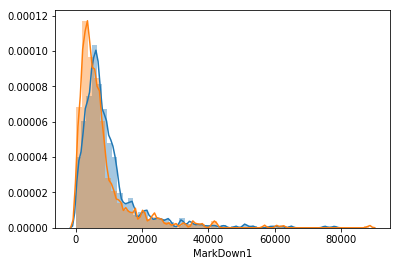

In [25]:
sns.distplot(df_A["MarkDown1"],label = "A")
sns.distplot(df_B["MarkDown1"],label = "B")


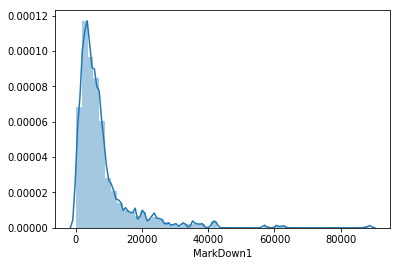

In [26]:
sns.distplot(df_B["MarkDown1"],label = "B")


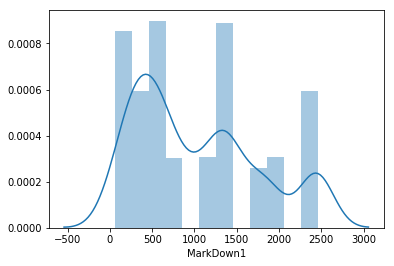

In [27]:
sns.distplot(df_C["MarkDown1"],label = "C")

In [28]:
df=df.replace({"Type":"A"},{"Type":0})
df=df.replace({"Type":"B"},{"Type":1})
df=df.replace({"Type":"C"},{"Type":2})

In [29]:
df["MarkDown1"].corr(df["year"])


0.14133242014594902

In [30]:
df["MarkDown1"].corr(df["Type"])

-0.257427258133383

In [31]:
df["MarkDown1"].corr(df["day"])

-0.29209633555907266

In [32]:
df["MarkDown1"].corr(df["month"])

-0.17618840419184212

In [33]:
df["MarkDown1"].corr(df["Store"])

-0.11958789095972737

In [34]:
df1 = df.dropna(axis=0)

In [35]:
pd.DataFrame(df1["MarkDown1"].groupby(df1["day"]).median())

,MarkDown1
day,
1,8200.12
2,9762.39
3,31765.22
4,21028.84
6,6364.53
7,10259.59
8,8429.61
9,7210.80
10,11374.63


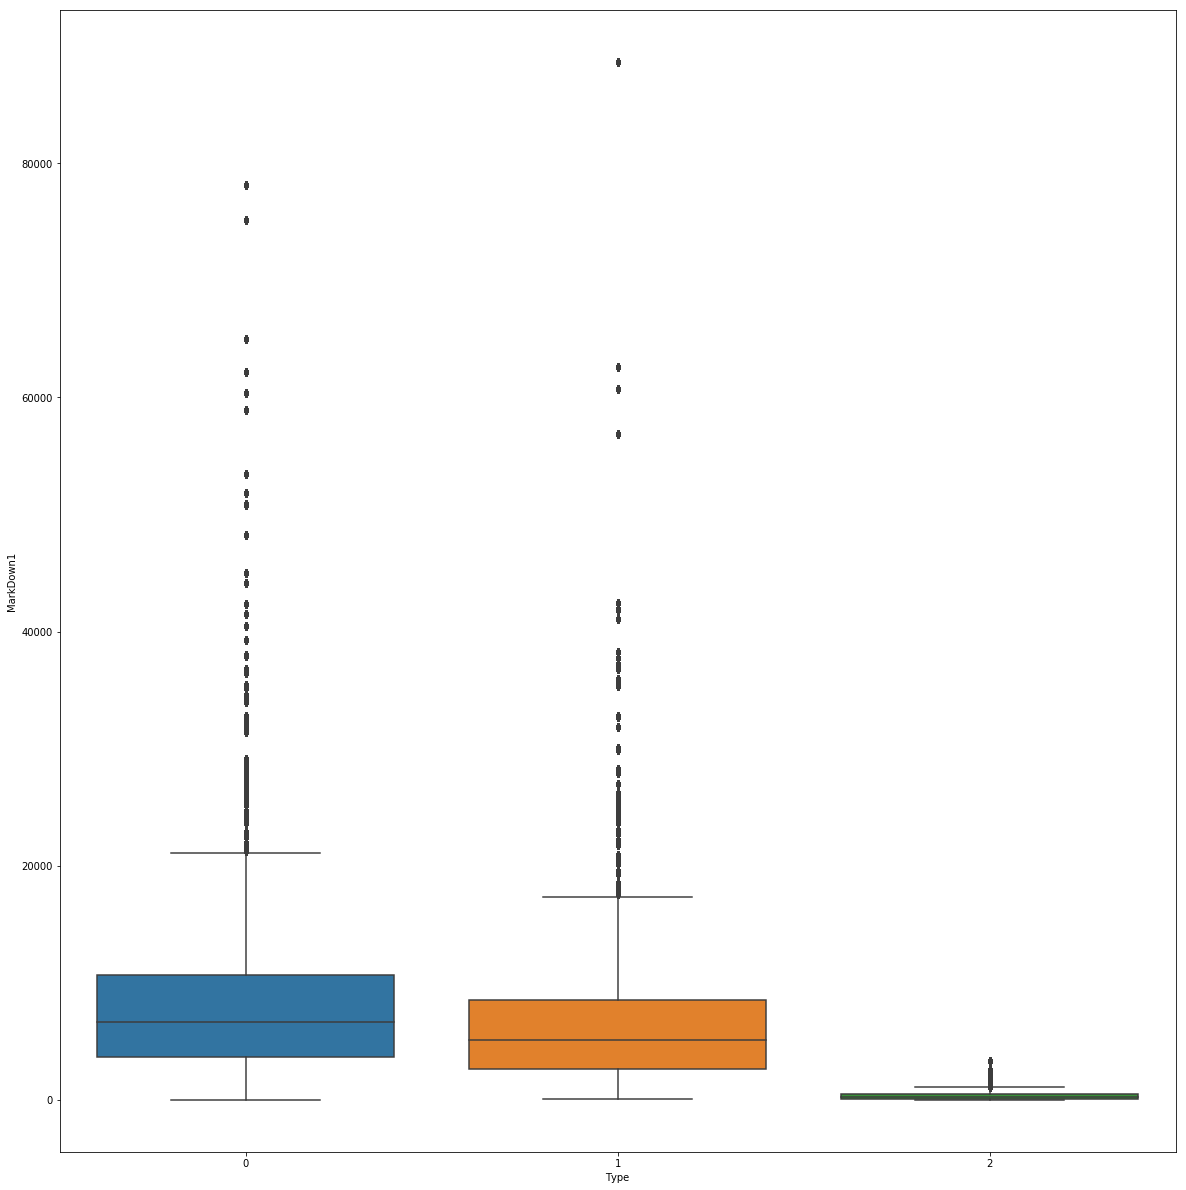

In [36]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.boxplot(df["Type"],df["MarkDown1"])

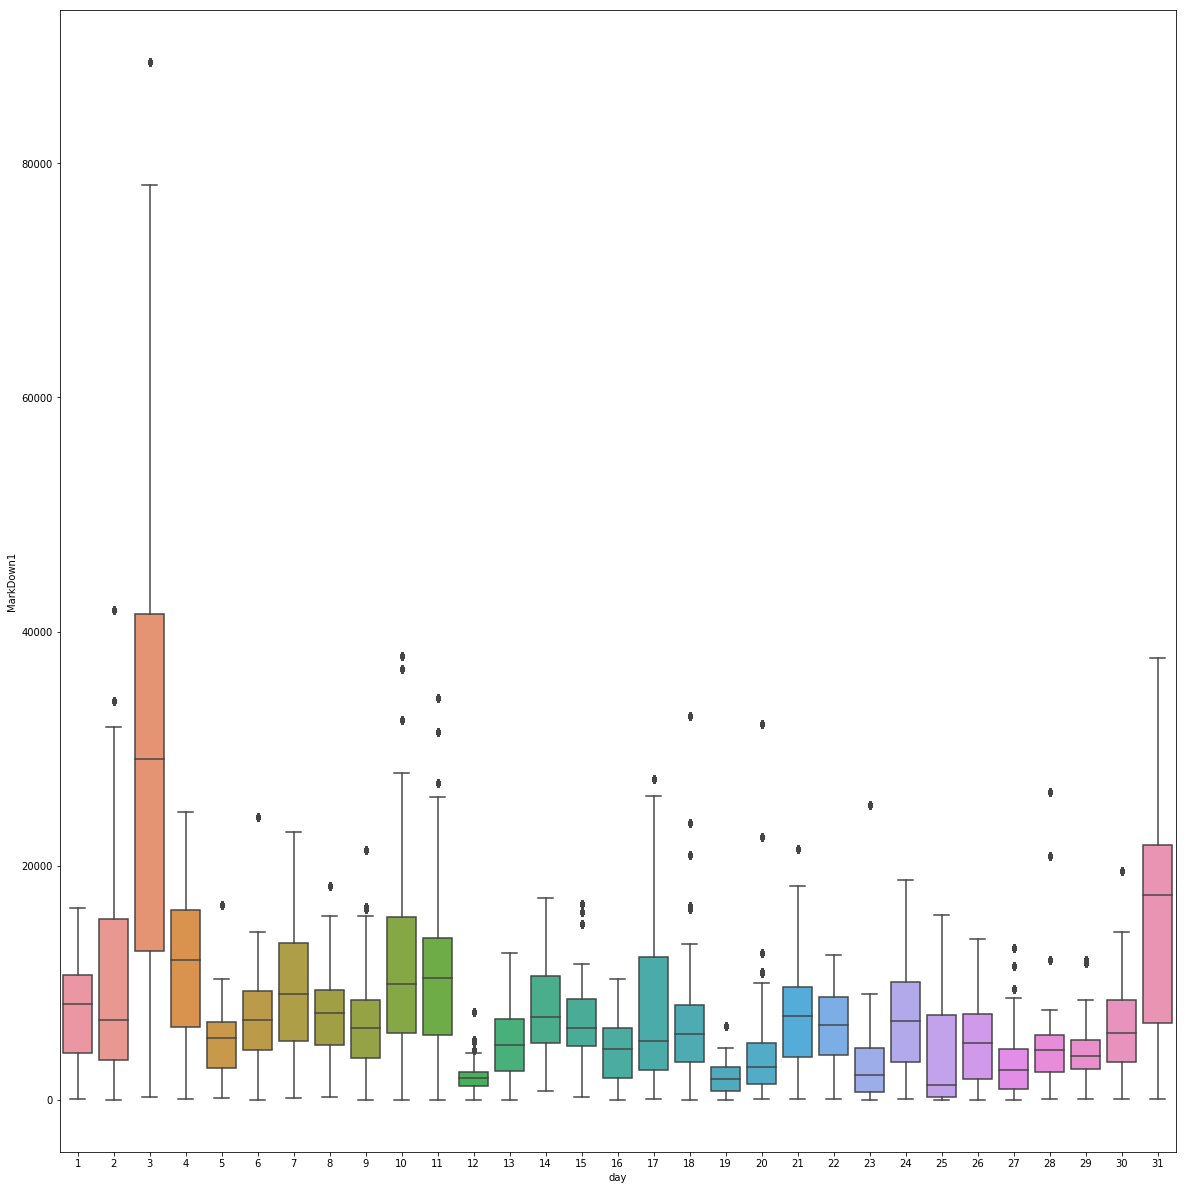

In [37]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.boxplot(df["day"],df["MarkDown1"])

In [38]:
len(df["day"].value_counts())

31

In [39]:
df["MarkDown1"] = df["MarkDown1"].fillna(0)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,day,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010


In [40]:
df_0=df[df["MarkDown1"]==0]

In [41]:
df_0.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,day,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2,5,2010


In [42]:
df1["MarkDown1"].groupby(df1["day"]).median().mean()

8596.775714285714

In [43]:
t = pd.DataFrame(df1["MarkDown1"].groupby(df1["day"]).median())

In [44]:
t

,MarkDown1
day,
1,8200.12
2,9762.39
3,31765.22
4,21028.84
6,6364.53
7,10259.59
8,8429.61
9,7210.80
10,11374.63


In [45]:
len(df_0)

270889

In [46]:
df_01 = df_0.merge(t,on="day",how='left').fillna(8596.78).drop(["MarkDown1_x"],axis=1)

In [47]:
df_01["MarkDown1"] = df_01["MarkDown1_y"]
df_01.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,day,year,MarkDown1_y,MarkDown1
0,1,1,2010-02-05,24924.50,False,42.31,2.572,8596.78,8596.78,8596.78,8596.78,211.096358,8.106,0,151315,2,5,2010,8596.78,8596.78
1,1,2,2010-02-05,50605.27,False,42.31,2.572,8596.78,8596.78,8596.78,8596.78,211.096358,8.106,0,151315,2,5,2010,8596.78,8596.78
2,1,3,2010-02-05,13740.12,False,42.31,2.572,8596.78,8596.78,8596.78,8596.78,211.096358,8.106,0,151315,2,5,2010,8596.78,8596.78
3,1,4,2010-02-05,39954.04,False,42.31,2.572,8596.78,8596.78,8596.78,8596.78,211.096358,8.106,0,151315,2,5,2010,8596.78,8596.78
4,1,5,2010-02-05,32229.38,False,42.31,2.572,8596.78,8596.78,8596.78,8596.78,211.096358,8.106,0,151315,2,5,2010,8596.78,8596.78


In [48]:
df_01 = df_01.drop("MarkDown1_y",axis=1)

In [49]:
len(df_01)

270889

In [50]:
len(df1)

97056

In [51]:
df2 = pd.concat([df1,df_01],sort=True)

In [52]:
len(df2)

367945

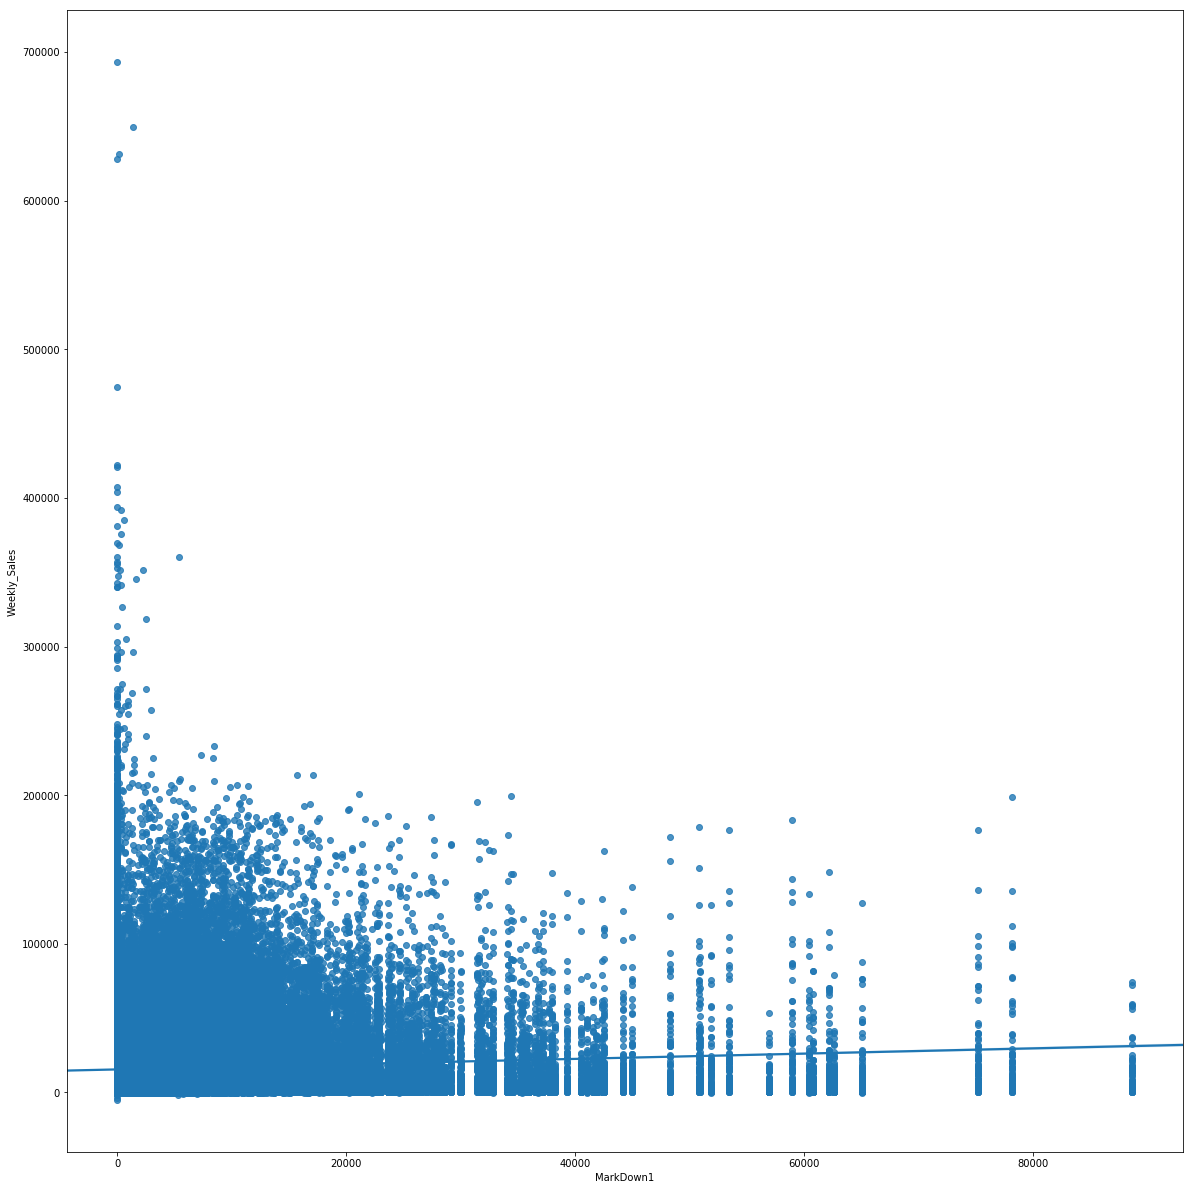

In [53]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.regplot(df["MarkDown1"],df["Weekly_Sales"])

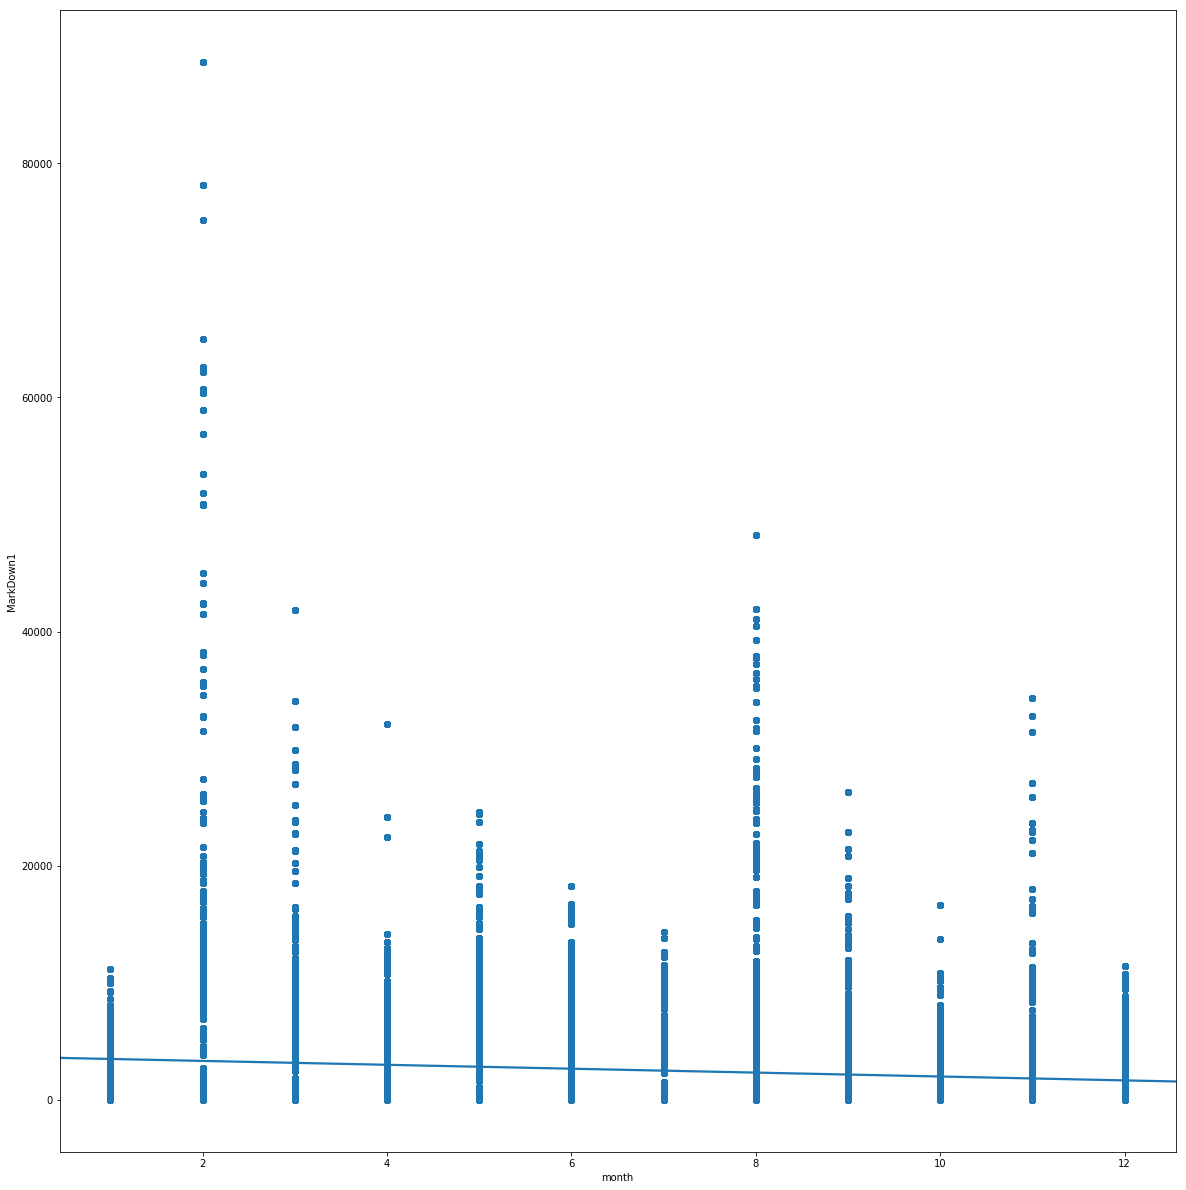

In [54]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.regplot(df["month"],df["MarkDown1"])

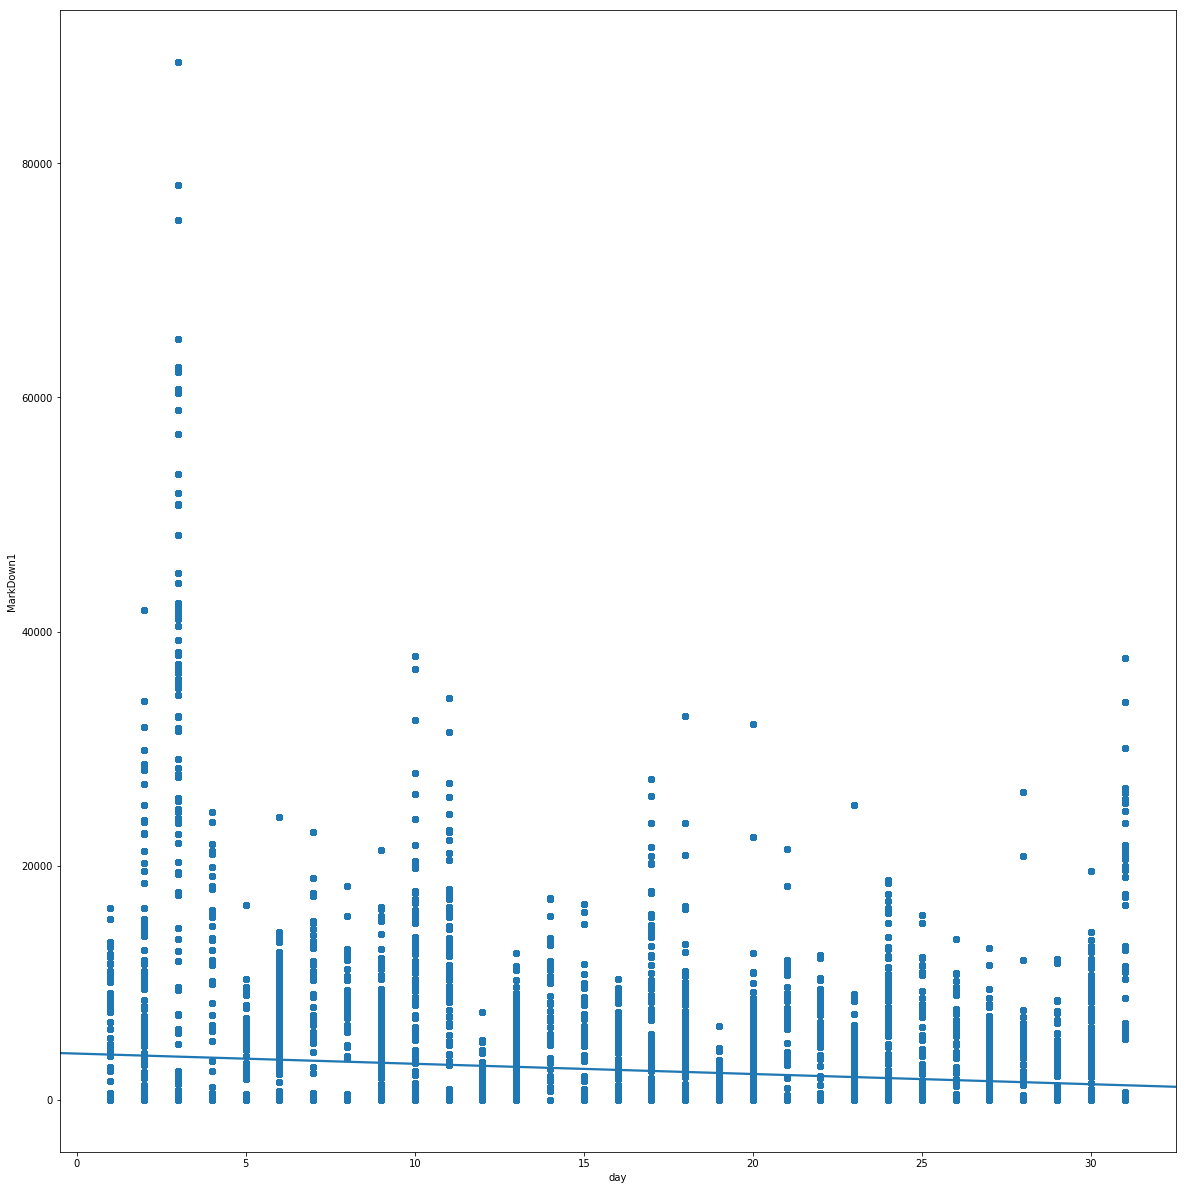

In [55]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.regplot(df["day"],df["MarkDown1"])

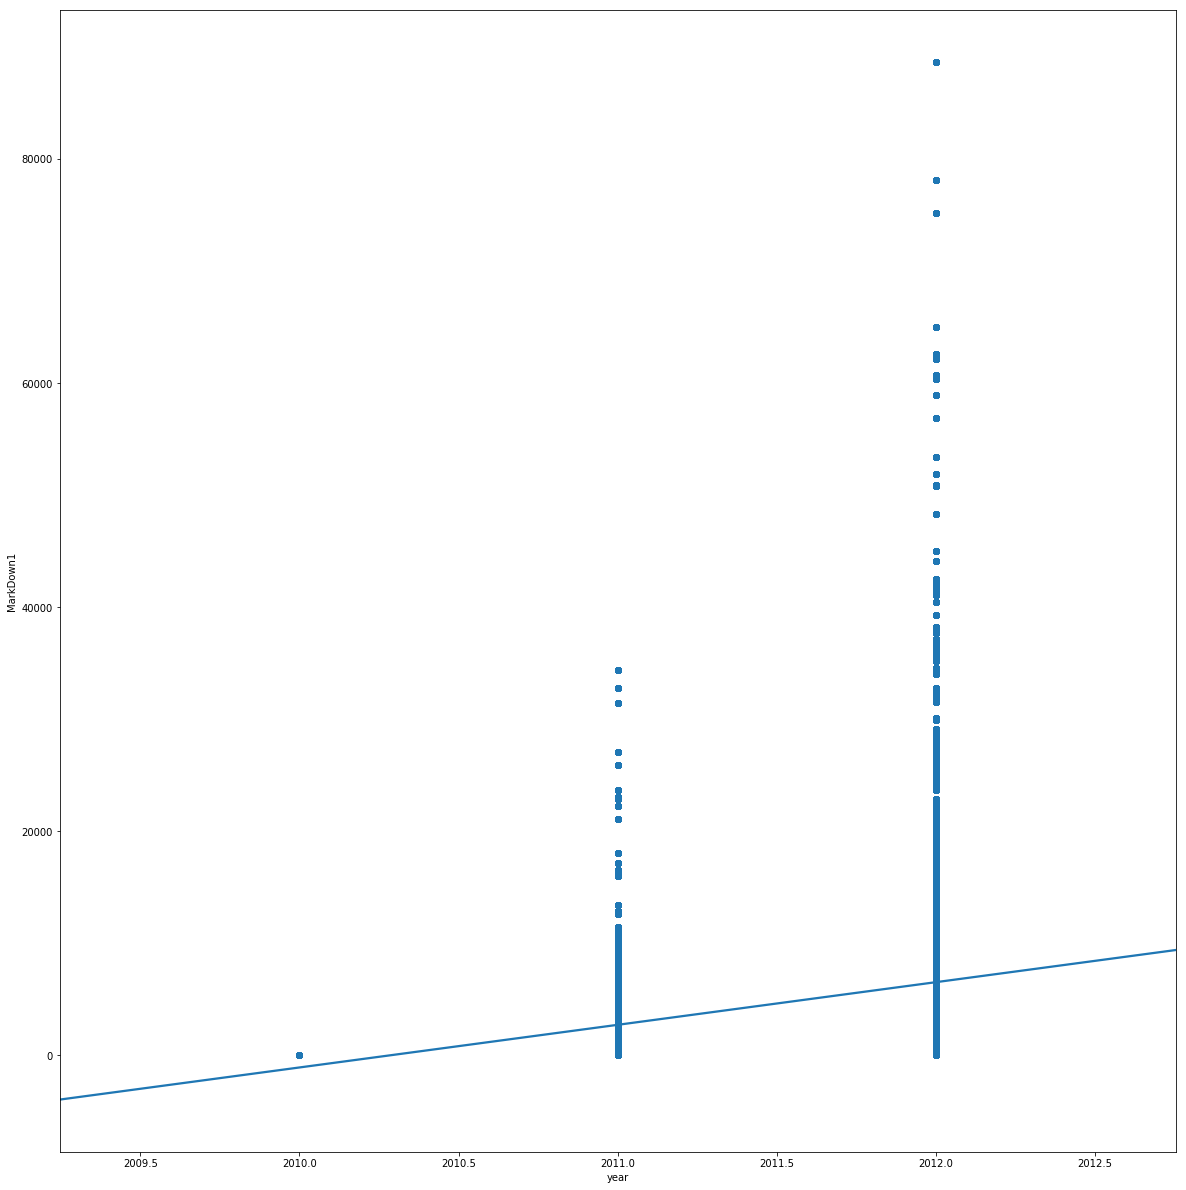

In [56]:
a, b = plt.subplots(1,1,figsize=(20,21))
sns.regplot(df["year"],df["MarkDown1"])

In [57]:
df2= df2.drop(["MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"],1)


In [58]:
df2.head()

,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,Weekly_Sales,day,month,year
6587,2011-11-11,1,3.297,False,10382.9,151315,1,59.11,0,18689.54,11,11,2011
6588,2011-11-11,2,3.297,False,10382.9,151315,1,59.11,0,44936.47,11,11,2011
6589,2011-11-11,3,3.297,False,10382.9,151315,1,59.11,0,9959.64,11,11,2011
6590,2011-11-11,4,3.297,False,10382.9,151315,1,59.11,0,36826.52,11,11,2011
6591,2011-11-11,5,3.297,False,10382.9,151315,1,59.11,0,31002.65,11,11,2011


In [59]:
df2_y = df2["Weekly_Sales"]

In [60]:
df2 = df2.drop("Date",1)

In [61]:
df2.head()

,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,Weekly_Sales,day,month,year
6587,1,3.297,False,10382.9,151315,1,59.11,0,18689.54,11,11,2011
6588,2,3.297,False,10382.9,151315,1,59.11,0,44936.47,11,11,2011
6589,3,3.297,False,10382.9,151315,1,59.11,0,9959.64,11,11,2011
6590,4,3.297,False,10382.9,151315,1,59.11,0,36826.52,11,11,2011
6591,5,3.297,False,10382.9,151315,1,59.11,0,31002.65,11,11,2011


In [62]:
test = test.merge(stores, on="Store",how='inner')
test.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [63]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [64]:
test = test.merge(features, on=("Store","Date","IsHoliday"),how='inner')
test.head()


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [65]:
test = test.drop(["MarkDown3","MarkDown2","MarkDown4","MarkDown5","CPI","Unemployment"],1)

In [66]:
test["year"] = test["Date"].astype("datetime64").dt.year
test["month"] = test["Date"].astype("datetime64").dt.month
test["day"] = test["Date"].astype("datetime64").dt.day
test = test.drop(["Date"],1)

In [67]:
test.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,year,month,day
0,1,1,False,A,151315,55.32,3.386,6766.44,2012,11,2
1,1,2,False,A,151315,55.32,3.386,6766.44,2012,11,2
2,1,3,False,A,151315,55.32,3.386,6766.44,2012,11,2
3,1,4,False,A,151315,55.32,3.386,6766.44,2012,11,2
4,1,5,False,A,151315,55.32,3.386,6766.44,2012,11,2


In [68]:
test1 = test.dropna(axis=0)

In [69]:
test_0 = test.fillna(0)
test_0 = test_0[test_0["MarkDown1"]==0]
test_0.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,year,month,day
106541,42,1,False,C,39690,70.79,4.099,0.0,2012,11,2
106542,42,2,False,C,39690,70.79,4.099,0.0,2012,11,2
106543,42,3,False,C,39690,70.79,4.099,0.0,2012,11,2
106544,42,4,False,C,39690,70.79,4.099,0.0,2012,11,2
106545,42,5,False,C,39690,70.79,4.099,0.0,2012,11,2


In [70]:
test_01 = test_0.merge(t,on="day",how='left').fillna(8596.78).drop(["MarkDown1_x"],axis=1)
test_01.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,year,month,day,MarkDown1_y
0,42,1,False,C,39690,70.79,4.099,2012,11,2,9762.39
1,42,2,False,C,39690,70.79,4.099,2012,11,2,9762.39
2,42,3,False,C,39690,70.79,4.099,2012,11,2,9762.39
3,42,4,False,C,39690,70.79,4.099,2012,11,2,9762.39
4,42,5,False,C,39690,70.79,4.099,2012,11,2,9762.39


In [71]:
test_01["MarkDown1"] = test_01["MarkDown1_y"]
test_01.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,year,month,day,MarkDown1_y,MarkDown1
0,42,1,False,C,39690,70.79,4.099,2012,11,2,9762.39,9762.39
1,42,2,False,C,39690,70.79,4.099,2012,11,2,9762.39,9762.39
2,42,3,False,C,39690,70.79,4.099,2012,11,2,9762.39,9762.39
3,42,4,False,C,39690,70.79,4.099,2012,11,2,9762.39,9762.39
4,42,5,False,C,39690,70.79,4.099,2012,11,2,9762.39,9762.39


In [72]:
test_01 = test_01.drop("MarkDown1_y",axis=1)
test_01.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,year,month,day,MarkDown1
0,42,1,False,C,39690,70.79,4.099,2012,11,2,9762.39
1,42,2,False,C,39690,70.79,4.099,2012,11,2,9762.39
2,42,3,False,C,39690,70.79,4.099,2012,11,2,9762.39
3,42,4,False,C,39690,70.79,4.099,2012,11,2,9762.39
4,42,5,False,C,39690,70.79,4.099,2012,11,2,9762.39


In [73]:
test2 = pd.concat([test1,test_01],sort=True)
test2.head()

,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,day,month,year
0,1,3.386,False,6766.44,151315,1,55.32,A,2,11,2012
1,2,3.386,False,6766.44,151315,1,55.32,A,2,11,2012
2,3,3.386,False,6766.44,151315,1,55.32,A,2,11,2012
3,4,3.386,False,6766.44,151315,1,55.32,A,2,11,2012
4,5,3.386,False,6766.44,151315,1,55.32,A,2,11,2012


In [74]:
len(test2)

115064

In [75]:
len(df2)

367945

In [76]:
df_train = df2.replace({"Type":"A"},{"Type": 0})
df_train = df_train.replace({"Type":"B"},{"Type": 1})
df_train = df_train.replace({"Type":"C"},{"Type": 2})

In [77]:
df_train.head()

,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,Weekly_Sales,day,month,year
6587,1,3.297,False,10382.9,151315,1,59.11,0,18689.54,11,11,2011
6588,2,3.297,False,10382.9,151315,1,59.11,0,44936.47,11,11,2011
6589,3,3.297,False,10382.9,151315,1,59.11,0,9959.64,11,11,2011
6590,4,3.297,False,10382.9,151315,1,59.11,0,36826.52,11,11,2011
6591,5,3.297,False,10382.9,151315,1,59.11,0,31002.65,11,11,2011


In [78]:
df_test = test2.replace({"Type":"A"},{"Type": 0})
df_test = df_test.replace({"Type":"B"},{"Type": 1})
df_test = df_test.replace({"Type":"C"},{"Type": 2})

In [79]:
df_test.head()

,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,day,month,year
0,1,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
1,2,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
2,3,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
3,4,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
4,5,3.386,False,6766.44,151315,1,55.32,0,2,11,2012


In [80]:
df2_y

6587      18689.54
6588      44936.47
6589       9959.64
6590      36826.52
6591      31002.65
            ...   
270884     1640.50
270885     3160.91
270886    53342.74
270887     6093.25
270888      749.18
Name: Weekly_Sales, Length: 367945, dtype: float64

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=4)

In [82]:
df_train = df_train.drop("Weekly_Sales",1)

In [83]:
rf.fit(df_train,df2_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [84]:
rf.feature_importances_

array([0.61857471, 0.00787924, 0.00279249, 0.00750208, 0.21255085,
       0.06966926, 0.01377739, 0.01175485, 0.01940961, 0.03431538,
       0.00177414])

In [85]:
df_test

,Dept,Fuel_Price,IsHoliday,MarkDown1,Size,Store,Temperature,Type,day,month,year
0,1,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
1,2,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
2,3,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
3,4,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
4,5,3.386,False,6766.44,151315,1,55.32,0,2,11,2012
...,...,...,...,...,...,...,...,...,...,...,...
144,94,3.431,False,9997.12,41062,43,86.44,2,14,6,2013
145,95,3.431,False,9997.12,41062,43,86.44,2,14,6,2013
146,96,3.431,False,9997.12,41062,43,86.44,2,14,6,2013
147,97,3.431,False,9997.12,41062,43,86.44,2,14,6,2013


In [86]:
result = rf.predict(df_test)

In [87]:
result

array([27843.1374, 46914.831 , 11108.0767, ..., 28721.8556, 20648.1782,
        8880.3433])

In [88]:
submission = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv")
submission.head()


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [89]:
submission["Weekly_Sales"] = result
submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,27843.1374
1,1_1_2012-11-09,46914.8310
2,1_1_2012-11-16,11108.0767
3,1_1_2012-11-23,39478.4702
4,1_1_2012-11-30,29839.3033


In [90]:
submission.to_csv("submission.csv",index=False)